<a href="https://colab.research.google.com/github/RLassorocio/fe-ct-prepcourse-fs/blob/main/Desafio_EvaluacionML_Lasso%2BMengascini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### introducción


El conjunto de datos del seguro médico contiene información sobre una serie de factores que pueden afectar los gastos médicos, incluidos la edad, el sexo, el IMC (bmi), el tabaquismo, la cantidad de hijos y la región. Este conjunto de datos se puede usar para entrenar un modelo de aprendizaje automático que puede predecir los gastos médicos para nuevos clientes.

Proporcionar información sobre los factores clave que contribuyen a mayores costos de seguros y ayudar a la empresa a tomar decisiones más informadas con respecto a la evaluación de precios y riesgos.

El objetivo de este trabajo es predecir en primer lugar el costo médico de una persona en función de la edad y el tabaquismo. En segundo lugar se busca predecir el costo médico pero incorporando el indice de masa muscular. Se realizaron modelos de Regresión Lineal y Árbol de Decisión.

### Analisis Explotatorio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
import os
print(os.getcwd())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


In [ ]:
data2 = pd.read_csv("/content/gdrive/MyDrive/Coderhouse DS   /Medical_insurance.csv", sep = ",")

In [ ]:
data2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
data2.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Sexo')

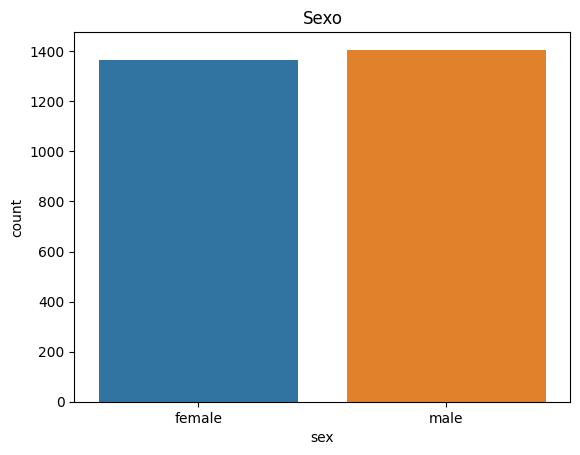

In [ ]:
sns.countplot(x=data2["sex"])
plt.title('Sexo')

Text(0.5, 1.0, 'Cantidad de fumandores')

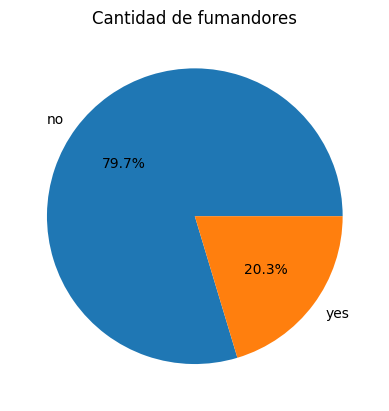

In [ ]:
data2smoker = data2['smoker'].value_counts()
plt.pie(data2smoker, labels=data2smoker.index, autopct='%1.1f%%')
plt.title('Cantidad de fumandores')

Text(0.5, 1.0, 'Región')

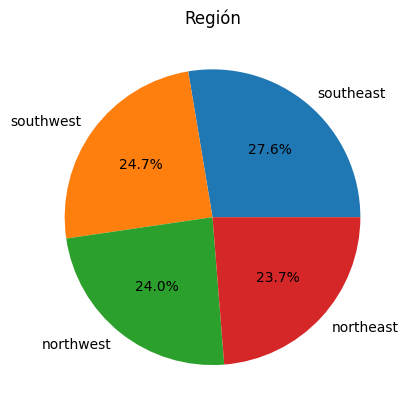

In [ ]:
data2region = data2['region'].value_counts()
plt.pie(data2region, labels=data2region.index, autopct='%1.1f%%')
plt.title('Región')

<ipython-input-22-686aa61b79f2>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data2.hist(ax = fig.gca())


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

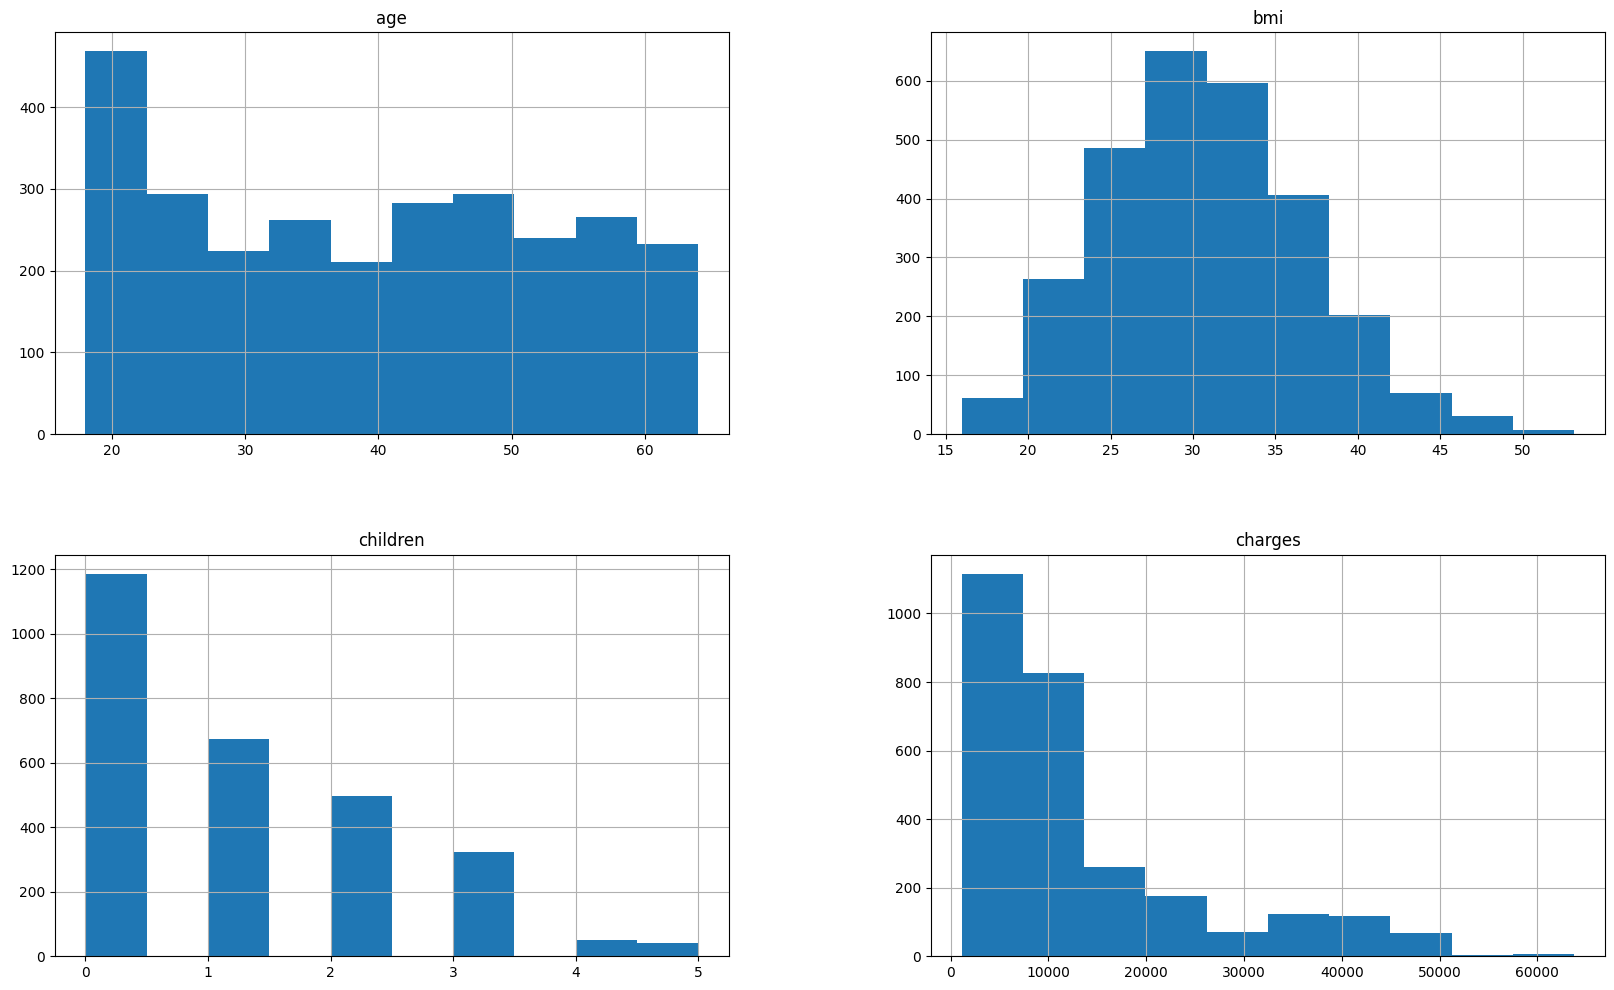

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,12))
data2.hist(ax = fig.gca())

In [ ]:
data2 = data2[['age','smoker', 'bmi','charges']]
data2['charges'] = data2['charges'].round(2)


<ipython-input-23-cc37a1a6c4e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['charges'] = data2['charges'].round(2)


In [ ]:
data3 = data2[['smoker','age','charges']]
data3['charges'] = data2['charges'].round(2)


<ipython-input-24-b72803885dea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['charges'] = data2['charges'].round(2)


### Modelado

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Metrics
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, f1_score, mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
encoded_col = ['smoker']
for x in encoded_col:
    data2[x] = le.fit_transform(data2[x])

In [ ]:
#Dividir los datos en entrenamiento y prueba
X = data2.drop('charges', axis=1)
y = data2['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Escalando los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelado 2

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
encoded_col = ['smoker']
for x in encoded_col:
    data3[x] = le.fit_transform(data3[x])

<ipython-input-29-d1bfaa92afff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3[x] = le.fit_transform(data3[x])


In [ ]:
#Dividir los datos en entrenamiento y prueba
X2 = data3.drop('charges', axis=1)
y2 = data3['charges']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
# Escalando los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X2_train)
X_test_scaled = scaler.transform(X2_test)

### Árbol de decisión: smoker, age


In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X2_train, y2_train)

DecisionTreeRegressor()

In [ ]:
y_pred1 = dt_model.predict(X2_test)

In [ ]:
dt_mse = mean_squared_error(y2_test, y_pred1)
dt_rmse = mean_squared_error(y2_test, y_pred1, squared=False)
dt_mae = mean_absolute_error(y2_test, y_pred1)
dt_r2 = r2_score(y2_test, y_pred1)

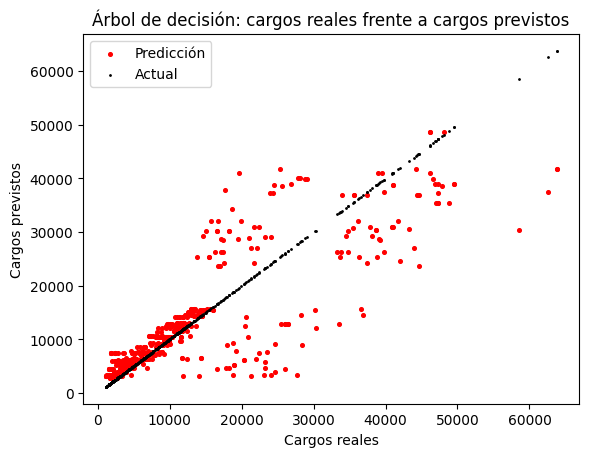

In [ ]:
# Gráfico de dispersión de los valores reales frente a los predichos
plt.scatter(y2_test, y_pred1, color='red', label='Predicción', s=7)
plt.scatter(y2_test, y2_test, color='black', label='Actual',s=1)

plt.xlabel('Cargos reales')
plt.ylabel('Cargos previstos')
plt.title('Árbol de decisión: cargos reales frente a cargos previstos')
plt.legend()
plt.show()

In [ ]:
print('Mean Squared Error (MSE):', dt_mse)
print('Root Mean Squared Error (RMSE):', dt_rmse)
print('Mean Absolute Error (MAE):', dt_mae)
print('R-squared (R2) Score:', dt_r2)

Mean Squared Error (MSE): 43732454.624346875
Root Mean Squared Error (RMSE): 6613.0518389278395
Mean Absolute Error (MAE): 4024.4809953093445
R-squared (R2) Score: 0.7150626697027235


### Árbol de decisión: smoker, age, bmi

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred1 = dt_model.predict(X_test)

In [ ]:
dt_mse = mean_squared_error(y_test, y_pred1)
dt_rmse = mean_squared_error(y_test, y_pred1, squared=False)
dt_mae = mean_absolute_error(y_test, y_pred1)
dt_r2 = r2_score(y_test, y_pred1)

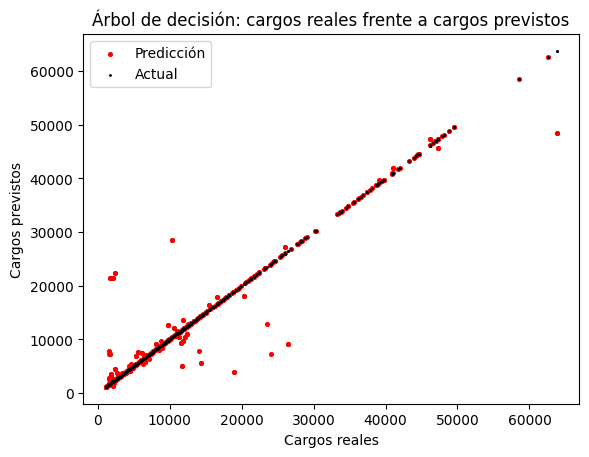

In [ ]:
# Gráfico de dispersión de los valores reales frente a los predichos
plt.scatter(y_test, y_pred1, color='red', label='Predicción', s=7)
plt.scatter(y_test, y_test, color='black', label='Actual',s=1)

plt.xlabel('Cargos reales')
plt.ylabel('Cargos previstos')
plt.title('Árbol de decisión: cargos reales frente a cargos previstos')
plt.legend()
plt.show()

In [ ]:
print('Mean Squared Error (MSE):', dt_mse)
print('Root Mean Squared Error (RMSE):', dt_rmse)
print('Mean Absolute Error (MAE):', dt_mae)
print('R-squared (R2) Score:', dt_r2)

Mean Squared Error (MSE): 9767796.336906025
Root Mean Squared Error (RMSE): 3125.347394595683
Mean Absolute Error (MAE): 777.9877357357358
R-squared (R2) Score: 0.9363582530403852


### Regresión Lineal: smoker, age  



In [ ]:
lr_model = LinearRegression()
lr_model.fit(X2_train, y2_train)

LinearRegression()

In [ ]:
y_pred2 = lr_model.predict(X2_test)

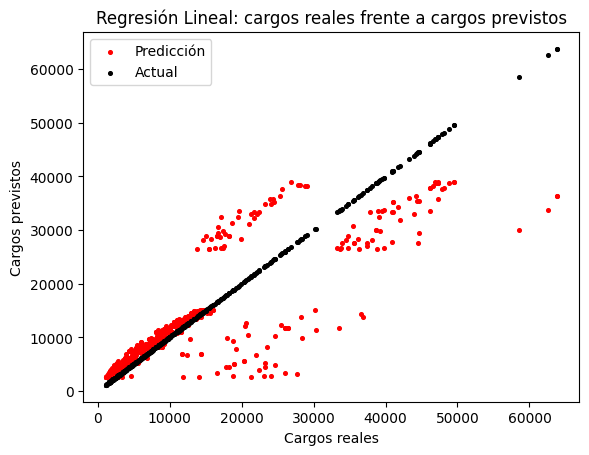

In [ ]:
# Calcular Métricas
lr_mse = mean_squared_error(y2_test, y_pred2)
lr_rmse = mean_squared_error(y2_test, y_pred2, squared=False)
lr_mae = mean_absolute_error(y2_test, y_pred2)
lr_r2 = r2_score(y2_test, y_pred2)

plt.scatter(y2_test, y_pred2, color='red', label='Predicción', s=7)
plt.scatter(y2_test, y2_test, color='black', label='Actual',s=7)

plt.xlabel('Cargos reales')
plt.ylabel('Cargos previstos')
plt.title('Regresión Lineal: cargos reales frente a cargos previstos')
plt.legend()
plt.show()

In [ ]:
# Printing metrics
print('Mean Squared Error (MSE):', lr_mse)
print('Root Mean Squared Error (RMSE):', lr_rmse)
print('Mean Absolute Error (MAE):', lr_mae)
print('R-squared (R2) Score:', lr_r2)

Mean Squared Error (MSE): 44784523.68792928
Root Mean Squared Error (RMSE): 6692.124004225361
Mean Absolute Error (MAE): 4106.312434646734
R-squared (R2) Score: 0.7082079492704834


### Regresión Lineal: smoker, age, bmi


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred2 = lr_model.predict(X_test)

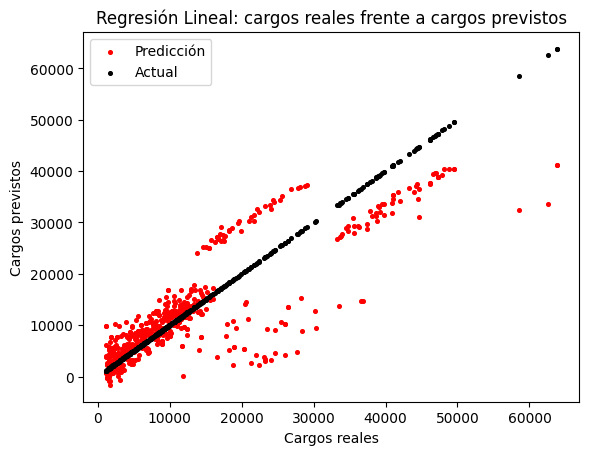

In [ ]:
# Calcular Métricas
lr_mse = mean_squared_error(y_test, y_pred2)
lr_rmse = mean_squared_error(y_test, y_pred2, squared=False)
lr_mae = mean_absolute_error(y_test, y_pred2)
lr_r2 = r2_score(y_test, y_pred2)

plt.scatter(y_test, y_pred2, color='red', label='Predicción', s=7)
plt.scatter(y_test, y_test, color='black', label='Actual',s=7)

plt.xlabel('Cargos reales')
plt.ylabel('Cargos previstos')
plt.title('Regresión Lineal: cargos reales frente a cargos previstos')
plt.legend()
plt.show()

In [ ]:
# Printing metrics
print('Mean Squared Error (MSE):', lr_mse)
print('Root Mean Squared Error (RMSE):', lr_rmse)
print('Mean Absolute Error (MAE):', lr_mae)
print('R-squared (R2) Score:', lr_r2)

Mean Squared Error (MSE): 40752861.03698571
Root Mean Squared Error (RMSE): 6383.7967571803
Mean Absolute Error (MAE): 4236.645325769725
R-squared (R2) Score: 0.7344761110347113
